In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from algbench import read_as_pandas
import re

font = {'family': 'serif', 'size': 11}
matplotlib.rc('font', **font)

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = [4.5, 3.5]

In [10]:
combo_results = read_as_pandas('results_combo', lambda row: {
    'algorithm': 'combo',
    'size': row['parameters']['args']['instance']['size'],
    'elapsed_cycles': (row['result']['avg_elapsed_cycles']),
    'instance': row['parameters']['args']['instance']['name']
})
qtg_results = read_as_pandas('results_qtg', lambda row: {
    'algorithm': 'qtg',
    'size': row['parameters']['args']['instance']['size'],
    'elapsed_cycles': np.average([measure['cycle_count'] for measure in row['result']['measurements']]),
    'instance': row['parameters']['args']['instance']['name']
})

results = pd.concat([combo_results, qtg_results])

results['g'] = results.apply(lambda row: int(re.match(r'.+\_g\_([0-9]+)\_.+', row['instance']).group(1)), axis=1)

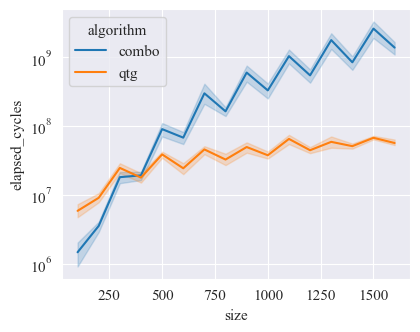

In [5]:
fig, ax = plt.subplots()
sns.lineplot(results[results['size'] > 30], x='size', y='elapsed_cycles', hue='algorithm', ax=ax)
ax.set_yscale('log')
plt.show()

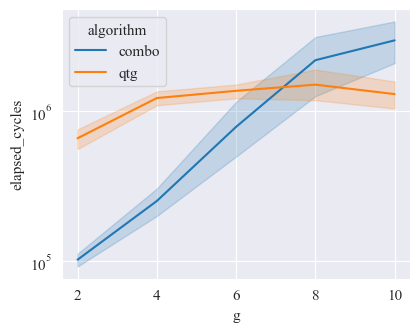

In [13]:
fig, ax = plt.subplots()
sns.lineplot(results[results['size'] == 30], x='g', y='elapsed_cycles', hue='algorithm', ax=ax)
ax.set_yscale('log')
plt.show()